In [1]:
# import the required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# load the data

In [2]:
df = pd.read_excel(r'D:\Sql_trainity\Statistics_new.xlsx')
print(df)

      application_id  Interview Taken on    Status event_name  \
0             383422 2014-05-01 11:40:00     Hired       Male   
1             907518 2014-05-06 08:08:00     Hired     Female   
2             176719 2014-05-06 08:08:00  Rejected       Male   
3             429799 2014-05-02 16:28:00  Rejected     Female   
4             253651 2014-05-02 16:32:00     Hired       Male   
...              ...                 ...       ...        ...   
7163          493131 2014-08-28 17:32:00     Hired       Male   
7164          214261 2014-08-31 01:36:00     Hired     Female   
7165          932441 2014-08-31 01:37:00     Hired       Male   
7166           39010 2014-08-31 01:38:00  Rejected       Male   
7167          686055 2014-08-26 12:14:00     Hired       Male   

                 Department Post Name  Offered Salary  
0        Service Department        c8         56553.0  
1        Service Department        c5         22075.0  
2        Service Department        c5         70069

In [3]:
# check the columns name
df.columns

Index(['application_id', 'Interview Taken on', 'Status', 'event_name',
       'Department', 'Post Name', 'Offered Salary'],
      dtype='object')

In [4]:
#check the shape and size of our dataset
df.shape

(7168, 7)

In [5]:
# check the nullvalue by isnull function
df.isnull().sum()

application_id        0
Interview Taken on    0
Status                0
event_name            0
Department            0
Post Name             0
Offered Salary        1
dtype: int64

In [6]:
# check the " - " value this also like a null values
df[df['event_name'].astype(str).str.contains('-')]

,application_id,Interview Taken on,Status,event_name,Department,Post Name,Offered Salary
15,195323,2014-05-09 12:48:00,Hired,-,Service Department,i7,81757.0
17,742283,2014-05-02 08:11:00,Rejected,-,Service Department,i5,100.0
1600,227046,2014-08-27 18:08:00,Hired,-,Operations Department,b9,76730.0
1789,711350,2014-07-16 13:33:00,Rejected,-,Operations Department,c-10,25785.0
2876,835053,2014-05-16 18:34:00,Hired,-,Operations Department,c5,25583.0
3257,444043,2014-07-11 14:52:00,Hired,-,Sales Department,c5,80262.0
4016,352309,2014-08-20 10:38:00,Hired,-,Service Department,i5,4308.0
4124,204014,2014-08-09 16:09:00,Rejected,-,Purchase Department,c5,96396.0
4408,901867,2014-08-18 09:36:00,Rejected,-,Service Department,c5,22393.0
5558,937905,2014-08-08 19:29:00,Hired,-,Marketing Department,c9,94032.0


In [7]:
#check some statistics values like MIN,MAX,STD etc
df.describe()

,application_id,Offered Salary
count,7168.000000,7167.000000
mean,508648.534459,49983.029022
std,285146.164429,28854.176890
min,12073.000000,100.000000
25%,262283.500000,25460.500000
50%,508025.000000,49625.000000
75%,757345.250000,74438.000000
max,999936.000000,400000.000000


In [8]:
#check some basic information of the data set like "DATA TYPE","VALUES","COLUMNS NAME"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7168 entries, 0 to 7167
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   application_id      7168 non-null   int64         
 1   Interview Taken on  7168 non-null   datetime64[ns]
 2   Status              7168 non-null   object        
 3   event_name          7168 non-null   object        
 4   Department          7168 non-null   object        
 5   Post Name           7168 non-null   object        
 6   Offered Salary      7167 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 392.1+ KB


Male                 4085
Female               2675
Don’t want to say     393
-                      15
Name: event_name, dtype: int64

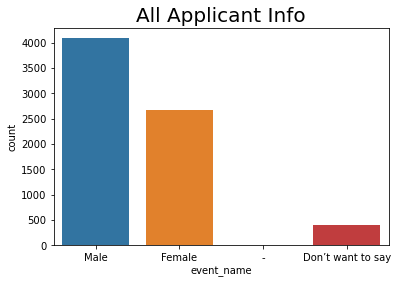

In [9]:
#check how many aaplicant applied 
sns.countplot('event_name',data=df)
plt.title('All Applicant Info',fontsize=20)
df['event_name'].value_counts()

Hired       4697
Rejected    2471
Name: Status, dtype: int64

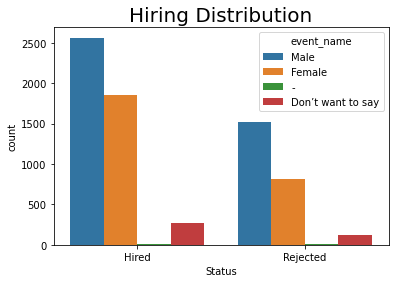

In [10]:
#check total hired and reject
sns.countplot('Status',hue="event_name",data=df)
plt.title('Hiring Distribution',fontsize=20)
df['Status'].value_counts()

# find the outlier using box plot

<AxesSubplot:xlabel='event_name', ylabel='Offered Salary'>

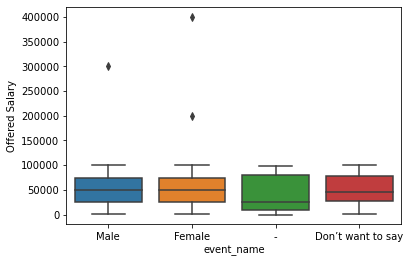

In [11]:

sns.boxplot(x="event_name", y="Offered Salary", data=df)

In [12]:
#check the skew in or data
df.skew()

application_id   -0.010293
Offered Salary    0.361579
dtype: float64

In [13]:
df.groupby('Department')['Offered Salary'].mean()

Department
Finance Department           49628.006944
General Management           58722.093023
Human Resource Department    49002.278351
Marketing Department         48489.935385
Operations Department        49151.354385
Production Department        49448.484211
Purchase Department          52564.774775
Sales Department             49310.380697
Service Department           50629.884185
Name: Offered Salary, dtype: float64

In [14]:
df.groupby('Department')['Offered Salary'].max()

Department
Finance Department            99762.0
General Management           400000.0
Human Resource Department     98195.0
Marketing Department          99828.0
Operations Department         99948.0
Production Department         99939.0
Purchase Department           99522.0
Sales Department              99824.0
Service Department           200000.0
Name: Offered Salary, dtype: float64

In [15]:
df.groupby('Department')['Offered Salary'].min()

Department
Finance Department           1038.0
General Management           1022.0
Human Resource Department    1415.0
Marketing Department         1007.0
Operations Department        1027.0
Production Department        1210.0
Purchase Department          1258.0
Sales Department             1487.0
Service Department            100.0
Name: Offered Salary, dtype: float64

In [16]:
df['Offered Salary'].max()

400000.0

In [17]:
df['Offered Salary'].min()

100.0

In [18]:
df['Offered Salary'].mean()

49983.02902190596

(array([2.838e+03, 2.961e+03, 1.365e+03, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+02, 4.0090e+04, 8.0080e+04, 1.2007e+05, 1.6006e+05,
        2.0005e+05, 2.4004e+05, 2.8003e+05, 3.2002e+05, 3.6001e+05,
        4.0000e+05]),
 <BarContainer object of 10 artists>)

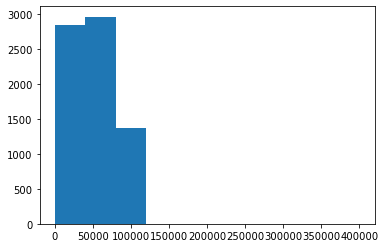

In [19]:
plt.hist(df["Offered Salary"])

Hired       4697
Rejected    2471
Name: Status, dtype: int64

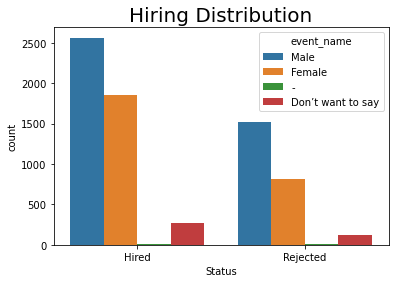

In [20]:
sns.countplot('Status',hue='event_name',data=df)
plt.title('Hiring Distribution',fontsize=20)
df['Status'].value_counts()

Text(0.5, 1.0, 'post wise distribution')

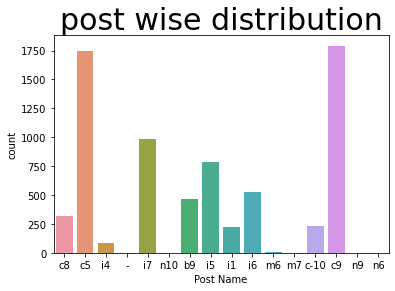

In [21]:
sns.countplot('Post Name',data=df)
plt.title('post wise distribution',fontsize=30)


In [22]:
df.columns

Index(['application_id', 'Interview Taken on', 'Status', 'event_name',
       'Department', 'Post Name', 'Offered Salary'],
      dtype='object')

Operations Department        2771
Service Department           2055
Sales Department              747
Production Department         380
Purchase Department           333
Marketing Department          325
Finance Department            288
General Management            172
Human Resource Department      97
Name: Department, dtype: int64

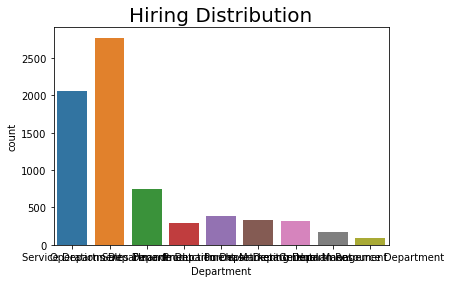

In [23]:
sns.countplot('Department',data=df)
plt.title('Hiring Distribution',fontsize=20)
df['Department'].value_counts()

<AxesSubplot:>

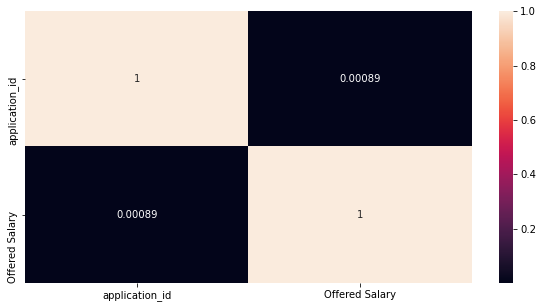

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

c9      1792
c5      1747
i7       982
i5       787
i6       527
b9       463
c8       320
c-10     232
i1       222
i4        88
m6         3
n6         1
n9         1
-          1
n10        1
m7         1
Name: Post Name, dtype: int64

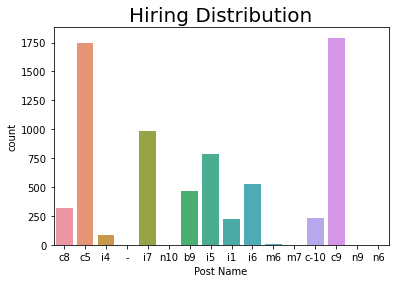

In [25]:
sns.countplot('Post Name',data=df)
plt.title('Hiring Distribution',fontsize=20)
df['Post Name'].value_counts()

application_id       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Offered Salary    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
dtype: object

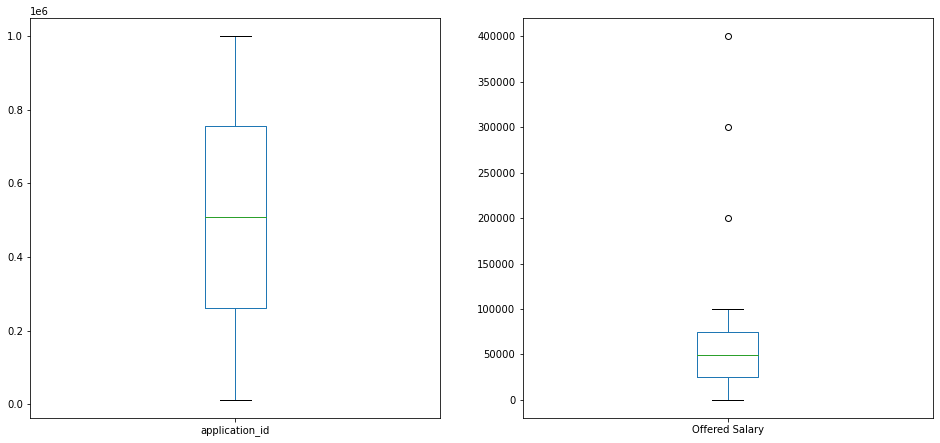

In [26]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(25,25))

<AxesSubplot:xlabel='Post Name', ylabel='Offered Salary'>

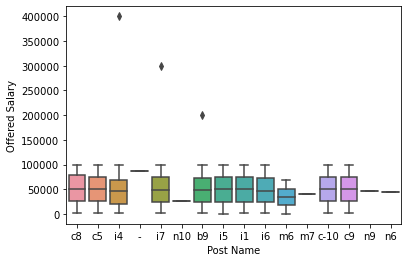

In [27]:
sns.boxplot(x="Post Name",y="Offered Salary",  data=df)

In [28]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

application_id    495061.75
Offered Salary     48977.50
dtype: float64


In [29]:
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

NameError: name 'percentile75' is not defined

In [30]:
print(df['Offered Salary'].quantile(0.10))
print(df['Offered Salary'].quantile(0.90))

10520.4
89152.60000000002


In [31]:
df["Offered Salary"] = np.where(df["Offered Salary"] <10520.4, 10520.4,df['Offered Salary'])
df["Offered Salary"] = np.where(df["Offered Salary"] >100000.0, 100000.0,df['Offered Salary'])

In [32]:
df["Offered Salary"] 

0       56553.0
1       22075.0
2       70069.0
3       10520.4
4       29668.0
         ...   
7163    49282.0
7164    57742.0
7165    69932.0
7166    14489.0
7167    54201.0
Name: Offered Salary, Length: 7168, dtype: float64

<AxesSubplot:xlabel='event_name', ylabel='Offered Salary'>

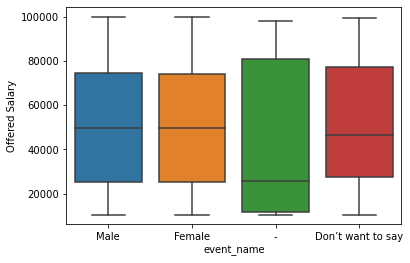

In [34]:
sns.boxplot(x="event_name", y="Offered Salary", data=df)

# no outliers in our data